<a href="https://colab.research.google.com/github/Todmount/KHAI_MLcourse/blob/PR5/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика №5
## Проста лінійна регресія. Метод найменших квадратів.

In [ ]:
# імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### Генерування даних для навчання моделі

In [ ]:
X, Y = make_regression(n_samples=300, n_features=1, n_informative=1,
                       noise=5, random_state=10)

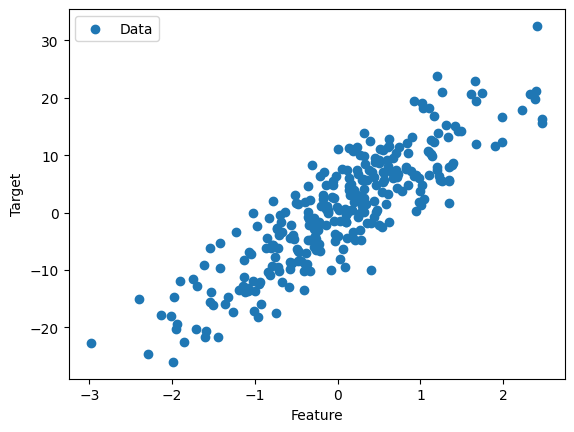

In [ ]:
plt.scatter(X, Y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [ ]:
print(X.shape)

(300, 1)


In [ ]:
print(Y.shape)

(300,)


#### Завдання №1

*Мета*: знаючи характер функціональної залежності, підібрати її параметри так, щоб вона найкраще описувала експериментальні дані $y_i$.

Розглянемо на прикладі простої лінійної функції:
$$f(x) = \omega_1x + \omega_0$$

Для такої простої лінійної функції достатньо визначити лише два параметри $\omega_1$ та $\omega_0$ для того, щоб побудувати наближення лінійного графіка до експериментальних даних.

Одним з головних критеріїв апроксимації є сума квадратів помилок відхилень:
$$ E = \[ \sum_{i=1}^{N} (y_i - f(x_i))^2 \]
$$

У методі найменших квадратів використовується мінімум суми квадратів помилок.

Знаходження параметрів виконується наступним чином:

$$ \omega_1 = \frac{\alpha_1 - m_xm_y}{\alpha_2 - m_x^2}$$

$$ \omega_0 = m_y - \omega_1 m_x$$

$$ \alpha_1 = \frac{1}{N}\sum_{i=1}^{N} y_ix_i$$

$$ \alpha_2 = \frac{1}{N}\sum_{i=1}^{N} x_i^2 $$

$$ m_x =  \frac{1}{N}\sum_{i=1}^{N} x_i $$

$$ m_y =  \frac{1}{N}\sum_{i=1}^{N} y_i $$

Наприкінці вивести отримані значення параметрів моделі і результат у вигляді вписаної прямої представити на графіку.

omega1: 7.574170409211588
omega0: 0.24308344049966873


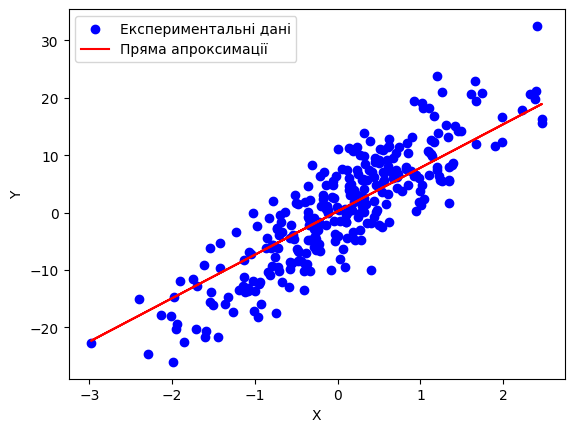

(300, 1)
(300,)


In [ ]:
# Ваш код
# Реалізація методу найменших квадратів для простої лінійної регресії
N = len(X)
alpha1 = np.sum(Y * X) / N
alpha2 = np.sum(X ** 2) / N
mx = np.mean(X)
my = np.mean(Y)
omega1 = (alpha1 - mx * my) / (alpha2 - mx ** 2)
omega0 = my - omega1 * mx

# Виведення значень параметрів
print(f"omega1: {omega1}")
print(f"omega0: {omega0}")

# Побудова графіка
plt.scatter(X, Y, color='blue', label='Експериментальні дані')
plt.plot(X, omega1 * X + omega0, color='red', label='Пряма апроксимації')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Завдання №2

Побудуйте модель лінійної регресії за допомогою модуля *LinearRegression*. Виведіть отримані параметри моделі і порівняйте їх зі своєю реалізацією.


МНК
ω1 : 7.574170409211588
ω0 : 0.24308344049966873
LinearRegression
ω1 (за допомогою LinearRegression): 9.15744622960348
ω0 (за допомогою LinearRegression): 0.177267569044669


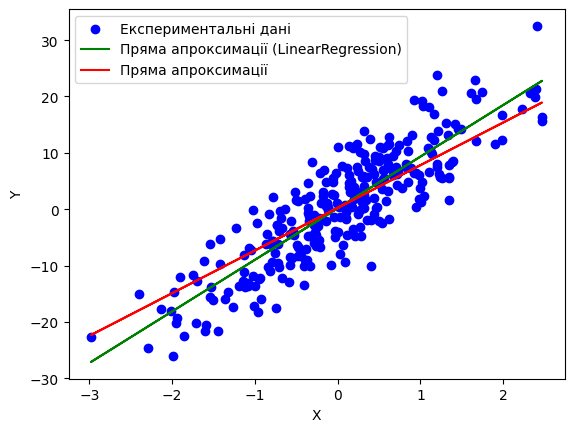

In [32]:
# Ваш код
# Побудова моделі лінійної регресії за допомогою LinearRegression
model = LinearRegression()
model.fit(X, Y)

# Виведення параметрів моделі
omega1_sklearn = model.coef_[0]
omega0_sklearn = model.intercept_
print("МНК")
print(f"ω1 : {omega1}")
print(f"ω0 : {omega0}")
print("LinearRegression")
print(f"ω1 (за допомогою LinearRegression): {omega1_sklearn}")
print(f"ω0 (за допомогою LinearRegression): {omega0_sklearn}")

# Побудова графіка
plt.scatter(X, Y, color='blue', label='Експериментальні дані')
plt.plot(X, model.predict(X), color='green', label='Пряма апроксимації (LinearRegression)') # Вивід прямої отриманої методом LinearRegression
plt.plot(X, omega1 * X + omega0, color='red', label='Пряма апроксимації') # Вивід прямої отриманої методом найменших квадратів
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

На мою думку, причина розбіжностей у значеннях параметрів полягає в тому, що можливі відмінності у точності обчислень. Ця різниця може виникати через використання різних підходів до розрахунку та врахування можливості перенавчання моделі, наприклад, через використання регуляризації, що є частиною методу LinearRegression за замовчуванням.